In [113]:
import streamlit as st

import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import datetime

import plotly.offline as pyo

from datetime import time,datetime,date

In [89]:
df = pd.read_csv("Employee_Reimbursements_Through_Payroll_System.csv")
df['Pay Date'] = pd.to_datetime(df['Pay Date'], format= '%m/%d/%Y')
df['Year']=pd.to_datetime(pd.DatetimeIndex(df['Pay Date']).year, format='%Y')
df['Month']=df['Pay Date'].dt.strftime('%B')
df['Month_Year']=df['Pay Date'].dt.strftime('%Y-%m')
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format= '%Y-%m')

In [108]:
df_monthyear = df.groupby(['Month_Year','Year','Month','Employee Name','Reimbursement Type', 'Department Name', 'Job Title']).sum().reset_index()
df_monthyear_s = df.groupby(['Month_Year','Year','Month','Reimbursement Type', 'Department Name', 'Job Title']).sum('Amount').reset_index()

df_year_s = df.groupby(['Year','Reimbursement Type', 'Department Name', 'Job Title']).sum('Amount').reset_index()

In [90]:
df.head(5)

,Pay Date,Employee Name,Amount,Reimbursement Type,Department Name,Job Title,Year,Month,Month_Year
0,2005-07-01,"ABREU, DARBIS",172.53,MILEAGE,DEPARTMENT OF WATER MANAGEMENT,HYDRANT INSPECTOR,2005-01-01,July,2005-07-01
1,2005-07-01,"ACOSTA, SEGUNDINO",250.00,MILEAGE,DEPT OF STREETS & SANITATION,REFUSE COLLECTION COORD,2005-01-01,July,2005-07-01
2,2005-07-01,"ADDESSO JR, FRANK J",250.00,MILEAGE,DEPT OF STREETS & SANITATION,MOTOR TRUCK DRIVER,2005-01-01,July,2005-07-01
3,2005-07-01,"ADDISON, RAYMOND",250.00,MILEAGE,DEPT OF STREETS & SANITATION,LABORER,2005-01-01,July,2005-07-01
4,2005-07-01,"ADEBAYO, BENJAMIN B",218.30,MILEAGE,DEPARTMENT OF BUILDINGS,BUILDING INSPECTOR,2005-01-01,July,2005-07-01


In [91]:
df.dtypes

Pay Date              datetime64[ns]
Employee Name                 object
Amount                       float64
Reimbursement Type            object
Department Name               object
Job Title                     object
Year                  datetime64[ns]
Month                         object
Month_Year            datetime64[ns]
dtype: object

In [92]:
df.describe() #dataframe has negative values

,Amount
count,83983.000000
mean,240.639048
std,133.244072
min,-700.000000
25%,139.730000
50%,238.650000
75%,335.220000
max,3137.000000


In [93]:
#number of unique values in the dataset
df.nunique()
#df['Pay Date'].unique() #Date range is from 2005 to 2021. Only has values from the 1st and 16th of each month

Pay Date                356
Employee Name          2107
Amount                16076
Reimbursement Type        2
Department Name          30
Job Title               335
Year                     17
Month                    12
Month_Year              190
dtype: int64

<AxesSubplot:>

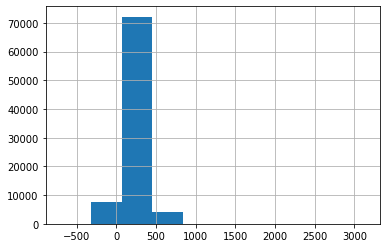

In [94]:
df['Amount'].hist() #values is skewed

In [95]:
print(df.isnull().sum()) # no null values

Pay Date              0
Employee Name         0
Amount                0
Reimbursement Type    0
Department Name       0
Job Title             0
Year                  0
Month                 0
Month_Year            0
dtype: int64


In [96]:
df.groupby('Reimbursement Type').sum()

,Amount
Reimbursement Type,
MILEAGE,20192943.06
MILEAGE PRIOR PERIOD,16646.13


In [97]:
df.groupby('Department Name').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Department Name,
DEPARTMENT OF BUILDINGS,4188879.60
CHICAGO DEPARTMENT OF TRANSPORTATION,3111107.83
DEPARTMENT OF WATER MANAGEMENT,2670767.56
DEPT OF STREETS & SANITATION,2303613.00
FIRE DEPARTMENT,2040439.32
OFFICE OF EMERGENCY COMMUNICATION,1775696.14
DEPARTMENT OF HEALTH,1687946.47
DEPT OF ASSETS INFORMATION AND SERVICES,965391.64
CITY CLERK,322496.95


In [98]:
df.groupby('Employee Name').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Employee Name,
"PERINO, PAUL C",79489.70
"WILLIAMSON, RICKY",77806.21
"WILLIAMS III, ERNEST",72002.67
"WILKINS, ANTHONY H",71478.23
"O CONNOR, MICHAEL J",71179.40
"HENDERSON, DENNIS R",70244.34
"WORRILL, OSCAR W",69064.56
"BRUNO, KEVIN P",67303.64
"BOWBIN, ROBERT J",66176.93


In [99]:
df.groupby('Employee Name').sum().sort_values('Amount', ascending = True).head(10)#lot of people have zero Amount

,Amount
Employee Name,
"THOMAS, HATTIE",0.0
"TANKSON, EVELYN",0.0
"JONES, VALERIE",0.0
"JANTKE, RACHEL LYNN",0.0
"GRUJICIC, MIRJANA E",0.0
"DICKENS, JASON",0.0
"GARCIA, NILDA",0.0
"PAGAN, LILLYBETH",0.0
"RODRIGUEZ, NADINE R",0.0


In [100]:
df.groupby('Job Title').sum().sort_values('Amount', ascending = False).head(10)

,Amount
Job Title,
BUILDING/CONSTRUCTION INSPECTOR,2503218.86
LINEMAN,1707421.29
PLUMBING INSPECTOR,1248208.98
TRAFFIC SIGNAL REPAIRMAN,1183685.28
FIELD SERVICE SPECIALIST II,1000418.68
FIREFIGHTER,644658.73
WATER RATE TAKER,591522.35
SANITARIAN II,572578.19
ELECTRICAL INSPECTOR,527349.76


In [102]:
df.shape

(83983, 9)

In [103]:
df_monthyear.shape

(82969, 8)

In [104]:
df_monthyear_s.shape

(17840, 7)

In [105]:
df_monthyear_s.head()

,Month_Year,Year,Month,Reimbursement Type,Department Name,Job Title,Amount
0,2005-07-01,2005-01-01,July,MILEAGE,BOARD OF ELECTION COMMISSIONER,CLERK - BD OF ELECTIONS,91.94
1,2005-07-01,2005-01-01,July,MILEAGE,BOARD OF ELECTION COMMISSIONER,INVESTIGATOR I-ELECTIONS,161.60
2,2005-07-01,2005-01-01,July,MILEAGE,BOARD OF ELECTION COMMISSIONER,PRINCIPAL CLERK-ELECTIONS,119.48
3,2005-07-01,2005-01-01,July,MILEAGE,BOARD OF ELECTION COMMISSIONER,SENIOR CLERK-ELECTIONS,161.60
4,2005-07-01,2005-01-01,July,MILEAGE,CHICAGO DEPARTMENT OF TRANSPORTATION,CIVIL ENGINEER II,250.00


In [158]:
df_monthyear_s[:5]['Department Name']

0          BOARD OF ELECTION COMMISSIONER
1          BOARD OF ELECTION COMMISSIONER
2          BOARD OF ELECTION COMMISSIONER
3          BOARD OF ELECTION COMMISSIONER
4    CHICAGO DEPARTMENT OF TRANSPORTATION
Name: Department Name, dtype: object

In [126]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_year_s['Year'],
           y=df_year_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Yearly Cost'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.show()

In [131]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_monthyear_s['Month_Year'],
           y=df_monthyear_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Month Year Cost'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [133]:
fig = go.Figure(
   data=[
       go.Bar(
           x=df_monthyear_s['Month'],
           y=df_year_s['Amount']
       )
   ],
   layout=go.Layout(
       title='Total Monthly Trends'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.show()

In [149]:
fig = go.Figure(
   data=[
       go.Bar(
           y=df_year_s['Department Name'],
           x=df_year_s['Amount'],
           orientation = 'h'
       )
   ],
   layout=go.Layout(
       title='Department Name'
   )
)
#pyo.plot(fig)
fig.update_traces(marker_line_width=0)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [146]:
fig = px.bar(df_year_s, x="Year", y="Amount", color="Department Name", barmode = 'stack')

fig.update_traces(marker_line_width=0)
fig.show()

In [147]:
fig = px.bar(df_year_s, x="Year", y="Amount", color="Job Title", barmode = 'stack')

fig.update_traces(marker_line_width=0) 
fig.show()

In [156]:
fig = go.Figure(
       go.Bar(
           y=df_year_s['Job Title'],
           x=df_year_s['Amount'],
           orientation='h'
       ),
   layout=go.Layout(
       title='Job Title'
   )
)
#pyo.plot(fig)
#fig.update_traces(marker_line_width=0)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()